In [20]:
import sqlite3
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt
import polertiek
import mplcursors

In [21]:
# Connect to the SQLite database
database_path = "../data/votes.sqlite"

# Create a DataFrame from the results
consensus, _ = polertiek.fetch_and_preprocess_consensus_data(database_path)

/Users/larsgebraad/Downloads/pol/src/polertiek.py:164: RuntimeWarning: invalid value encountered in divide
  # Calculate the outer product with the correlation matrix
/Users/larsgebraad/Downloads/pol/src/polertiek.py:164: RuntimeWarning: invalid value encountered in divide
  # Calculate the outer product with the correlation matrix
/Users/larsgebraad/Downloads/pol/src/polertiek.py:164: RuntimeWarning: invalid value encountered in divide
  # Calculate the outer product with the correlation matrix


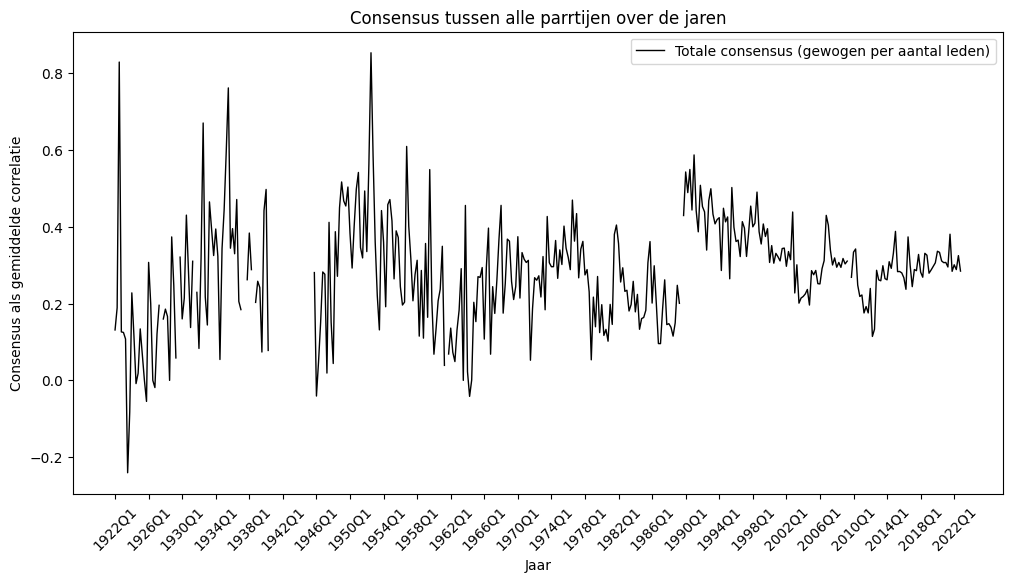

In [22]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(
    consensus["quarter"],
    consensus["consensus"],
    label="Totale consensus (gewogen per aantal leden)",
    c="k",
    linewidth=1,
)

# Customize the x-axis ticks
n = 16  # Display every n-th quarter
selected_quarters = consensus["quarter"][::n]
plt.xticks(
    selected_quarters, rotation=45
)  # Rotate labels for better readability

plt.xlabel("Jaar")
plt.ylabel("Consensus als gemiddelde correlatie")
plt.title("Consensus tussen alle parrtijen over de jaren")
plt.legend()
plt.show()

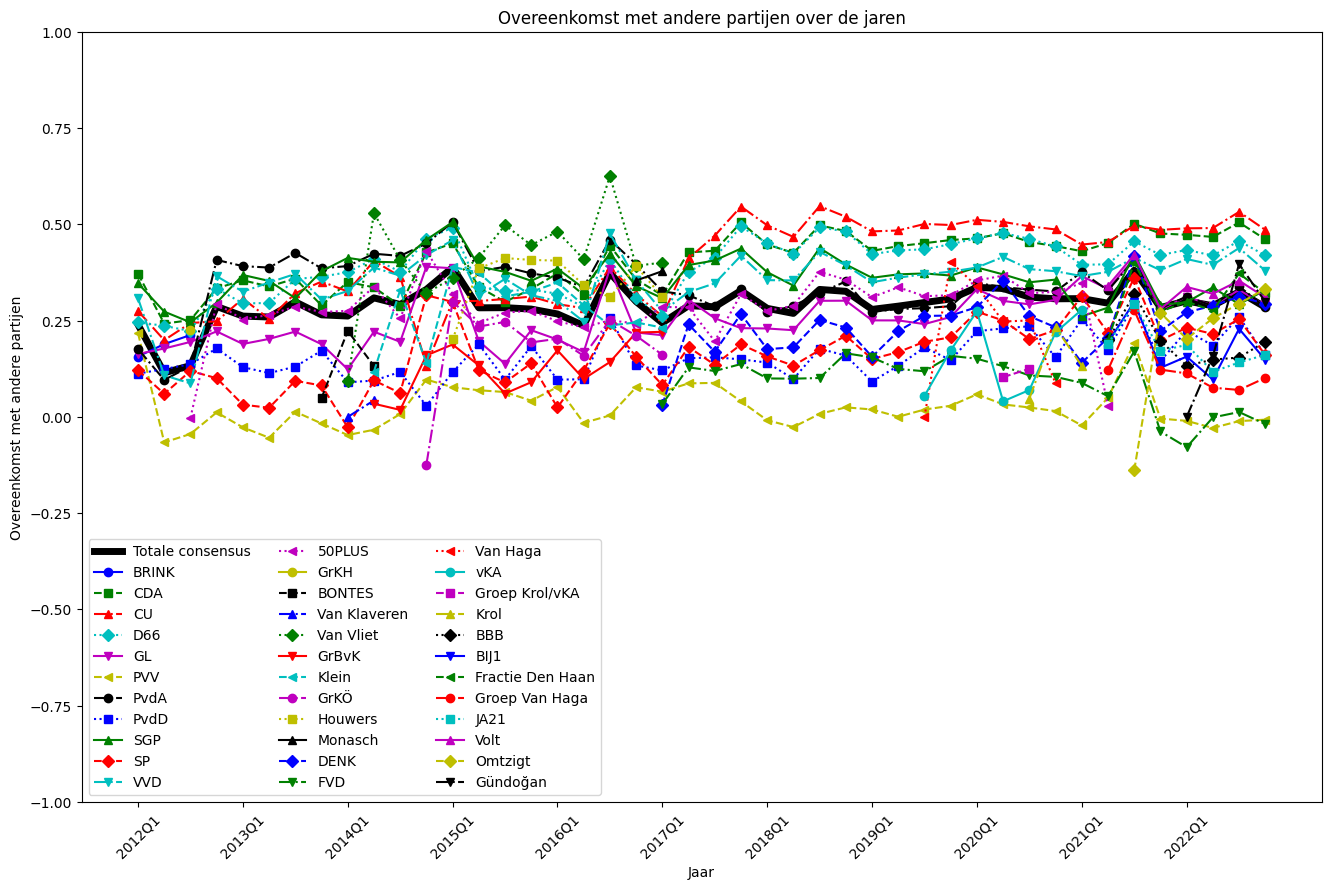

In [19]:
import itertools

# Create a DataFrame from the results
(
    consensus_12_22,
    party_agreement,
) = polertiek.fetch_and_preprocess_consensus_data(
    database_path, start_year=2012
)

# Plot
fig, ax = plt.subplots(figsize=(16, 10))

# Define line styles, colors, and marker styles
line_styles = ["-", "--", "-.", ":"]
colors = ["b", "g", "r", "c", "m", "y", "k"]
markers = ["o", "s", "^", "D", "v", "<"]

# Create an iterator for each style
line_style_cycle = itertools.cycle(line_styles)
color_cycle = itertools.cycle(colors)
marker_cycle = itertools.cycle(markers)

plt.plot(
    consensus_12_22["quarter"],
    consensus_12_22["consensus"],
    label="Totale consensus",
    c="k",
    linewidth=5,
)

# Customize the x-axis ticks
n = 4  # Display every n-th quarter
selected_quarters = consensus_12_22["quarter"][::n]

# Iterate through the columns and plot each one with a different style
for column in party_agreement.columns:
    line_style = next(line_style_cycle)
    color = next(color_cycle)
    marker = next(marker_cycle)

    party_agreement[column].plot(
        ax=ax, linestyle=line_style, color=color, marker=marker, label=column
    )

# Add labels and title
ax.set_xlabel("Jaar")
ax.set_ylabel("Overeenkomst met andere partijen")
ax.set_title("Overeenkomst met andere partijen over de jaren")


# Specify the legend location and columns
ax.legend(loc="lower left", ncol=3)

ax.set_ylim([-1, 1])

# Enable tooltips on hover using mplcursors
cursor = mplcursors.cursor(hover=True)

plt.xticks(
    selected_quarters, rotation=45
)  # Rotate labels for better readability


# Show the plot
plt.show()

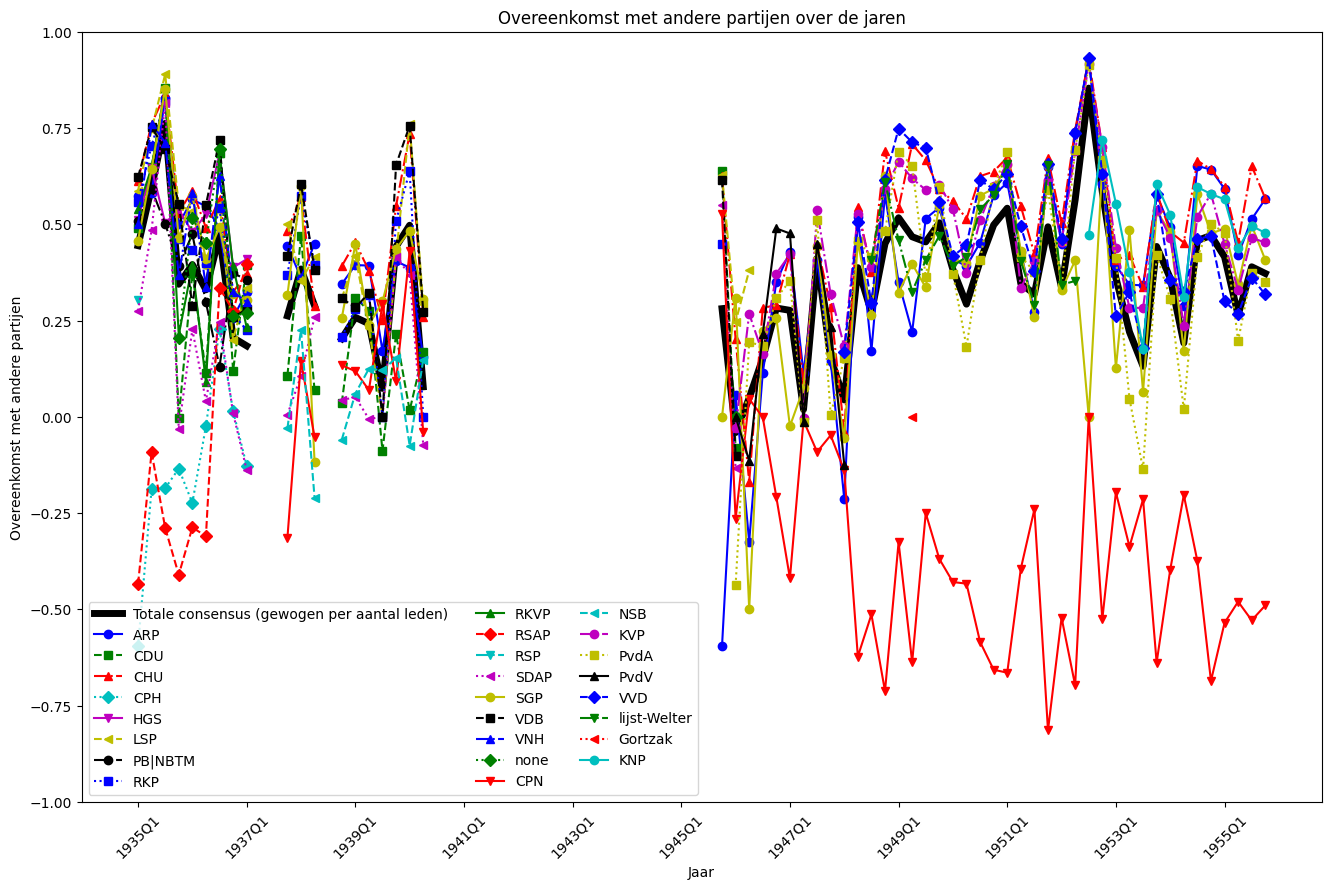

In [16]:
import itertools

# Create a DataFrame from the results
(
    consensus_35_55,
    party_agreement_35_55,
) = polertiek.fetch_and_preprocess_consensus_data(
    database_path, start_year=1935, end_year=1955
)

# Plot
fig, ax = plt.subplots(figsize=(16, 10))

# Define line styles, colors, and marker styles
line_styles = ["-", "--", "-.", ":"]
colors = ["b", "g", "r", "c", "m", "y", "k"]
markers = ["o", "s", "^", "D", "v", "<"]

# Create an iterator for each style
line_style_cycle = itertools.cycle(line_styles)
color_cycle = itertools.cycle(colors)
marker_cycle = itertools.cycle(markers)

plt.plot(
    consensus_35_55["quarter"],
    consensus_35_55["consensus"],
    label="Totale consensus",
    c="k",
    linewidth=5,
)

# Customize the x-axis ticks
n = 8  # Display every n-th quarter
selected_quarters = consensus_35_55["quarter"][::n]

# Iterate through the columns and plot each one with a different style
for column in party_agreement_35_55.columns:
    line_style = next(line_style_cycle)
    color = next(color_cycle)
    marker = next(marker_cycle)

    party_agreement_35_55[column].plot(
        ax=ax, linestyle=line_style, color=color, marker=marker, label=column
    )

# Add labels and title
ax.set_xlabel("Jaar")
ax.set_ylabel("Overeenkomst met andere partijen")
ax.set_title("Overeenkomst met andere partijen over de jaren")


# Specify the legend location and columns
ax.legend(loc="lower left", ncol=3)

ax.set_ylim([-1, 1])

# Enable tooltips on hover using mplcursors
cursor = mplcursors.cursor(hover=True)

plt.xticks(
    selected_quarters, rotation=45
)  # Rotate labels for better readability


# Show the plot
plt.show()